<a href="https://colab.research.google.com/github/SauloHenriqueAguiar/backtestBacktrading/blob/main/TeslaactionsBacktrader.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
#instala biblioteca yahoo_fin
!pip install yahoo_fin

     |████████████████████████████████| 81 kB 4.0 MB/s 
     |████████████████████████████████| 83 kB 2.2 MB/s 
     |████████████████████████████████| 103 kB 46.6 MB/s 
     |████████████████████████████████| 127 kB 41.4 MB/s 
  Created wheel for fake-useragent: filename=fake_useragent-0.1.11-py3-none-any.whl size=13502 sha256=e490dcf6e5c3d4c2e45e49d92b36e32e14c1ae65474eb1fec2ac9521dcc98bbb
  Stored in directory: /root/.cache/pip/wheels/ed/f7/62/50ab6c9a0b5567267ab76a9daa9d06315704209b2c5d032031
  Created wheel for parse: filename=parse-1.19.0-py3-none-any.whl size=24591 sha256=c5dc80bcb3f0ca57add91f7dc7b82d7a3672808c22d71b22757eabb902753be6
  Stored in directory: /root/.cache/pip/wheels/9c/aa/cc/f2228050ccb40f22144b073f15a2c84f11204f29fc0dce028e
  Created wheel for sgmllib3k: filename=sgmllib3k-1.0.0-py3-none-any.whl size=6065 sha256=bf716654cbbe1f7a4ae5fd608a87473cfdd3e5aeeccaae1906e2be16f7188b16
  Stored in directory: /root/.cache/pip/wheels/73/ad/a4/0dff4a6ef231fc0dfa12ffbac2a36ce

In [4]:
#instala biblioteca yfinance
!pip install yfinance --upgrade --no-cache-dir

     |████████████████████████████████| 6.3 MB 7.8 MB/s 
  Created wheel for yfinance: filename=yfinance-0.1.64-py2.py3-none-any.whl size=24109 sha256=0aeb9044e1f9bbab091e4ffed17203c82043a643679b2aed9e69bcb44a3b3dfe
  Stored in directory: /tmp/pip-ephem-wheel-cache-939zayub/wheels/86/fe/9b/a4d3d78796b699e37065e5b6c27b75cff448ddb8b24943c288
Successfully built yfinance
  Attempting uninstall: lxml
    Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6


In [6]:
#instala request
!pip install requests_html

In [7]:
# Instalar Backtrader
!pip install backtrader

     |████████████████████████████████| 410 kB 5.5 MB/s 


In [8]:
# Obtenha os pacotes necessários

from datetime import datetime
import backtrader as bt
from IPython.display import display, Image
import yfinance as yf

In [9]:
#Definição de classe de estratégia cruzada de média móvel simples (SMA)

class SmaCross(bt.Strategy):
    # lista de parâmetros configuráveis para a estratégia
    params = dict(
        pfast=10,  # período para a média móvel rápida
        pslow=30   # período para a média móvel lenta
    )

    def __init__(self):
        sma1 = bt.ind.SMA(period=self.p.pfast)  # média móvel rápida
        sma2 = bt.ind.SMA(period=self.p.pslow)  # média móvel lenta
        self.crossover = bt.ind.CrossOver(sma1, sma2)  # crossover signal(sinal de cruzamento)

    def next(self):
        if not self.position:  # not in the market(não no mercado)
            if self.crossover > 0:  # if fast crosses slow to the upside(se o cruzamento rápido for lento para cima)
                self.buy()  # enter long(entrar por muito tempo)

        elif self.crossover < 0:  # in the market & cross to the downside(no mercado e cruze para o lado negativo)
            self.close()  # close long position(fechar posição longa)

In [10]:
# Definição de classe de estratégia de índice de força relativa (RSI)

class RSI(bt.Strategy):

    def __init__(self):
        self.rsi = bt.indicators.RSI(self.data.close)

    def next(self):
        if not self.position: #Se você ainda não comprou o estoque
            if self.rsi < 30:
                self.order = self.buy()

        elif self.rsi > 70:
            self.order = self.sell()

In [11]:
from yahoo_fin.stock_info import get_data
tesla_weekly= get_data("TSLA", start_date="12/04/2011", end_date="12/04/2021", index_as_date = True, interval="1wk")
tesla_weekly

,open,high,low,close,adjclose,volume,ticker
2011-12-05,6.706000,7.000000,5.922000,6.208000,6.208000,36657500,TSLA
2011-12-12,6.088000,6.186000,5.596000,5.600000,5.600000,23233500,TSLA
2011-12-19,5.618000,5.700000,5.206000,5.580000,5.580000,25683000,TSLA
2011-12-26,5.532000,5.868000,5.528000,5.712000,5.712000,10903500,TSLA
2012-01-02,5.788000,5.900000,5.282000,5.382000,5.382000,17750000,TSLA
...,...,...,...,...,...,...,...
2021-10-11,787.650024,843.210022,785.500000,843.030029,843.030029,81405600,TSLA
2021-10-18,851.789978,910.000000,851.469971,909.679993,909.679993,109982700,TSLA
2021-10-25,950.530029,1115.209961,944.200012,1114.000000,1114.000000,220925200,TSLA
2021-11-01,1145.000000,1215.390015,1118.660034,1213.859985,1213.859985,133213200,TSLA


In [12]:
tesla_weekly.to_csv('/content/tesla.csv')

In [13]:
# Configurações do Cerebro (Mecanismo do Backtrader)

# importar para o cerebro
cerebro = bt.Cerebro()

# Importar dados financeiros do Yahoo


data = bt.feeds.YahooFinanceData(dataname= 'tesla.csv') # data final

# Adicionar dados
cerebro.adddata(data)

# Adicionar estratégia

#cerebro.addstrategy(SmaCross) 
cerebro.addstrategy(RSI) 

# Configurações do corretor
cerebro.broker.setcash(10000000)

# Configurando unidades comerciais
cerebro.addsizer(bt.sizers.SizerFix, stake=30) #30 semanas de cada vez

quantidade final :  10001676.700000001 1
produção :  0.016767000000011176 %


<IPython.core.display.Javascript object>

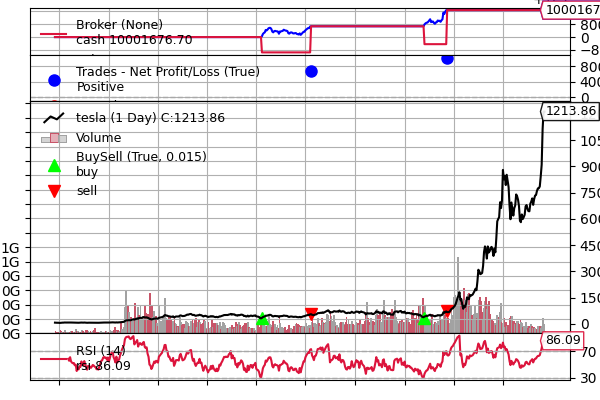

In [14]:
#  compilando com Cerebro

# Obtenha seu investimento inicial
init_cash = cerebro.broker.getvalue()

# compilando com Cerebro
cerebro.run()

# Obtenha o valor final
final_cash = cerebro.broker.getvalue()

print("quantidade final : ", final_cash, "1")
print("produção : ", float(final_cash - init_cash)/float(init_cash) * 100., "%")

# imprima o gráfico
cerebro.plot()[0][0].savefig('plot.png', dpi=100)
display(Image(filename='plot.png'))